In [155]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Basic EDA

In [156]:
df = pd.read_csv('/content/adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [158]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [159]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [160]:
df.duplicated().sum()

np.int64(24)

In [161]:
df = df.drop_duplicates()

In [162]:
df.duplicated().sum()

np.int64(0)

In [163]:
df['workclass'].unique() # Unknown have in column

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [164]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [165]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [166]:
df['occupation'].unique() # unknown value in column

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [167]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [168]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [169]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [170]:
df['native_country'].unique() # Unknown value in column

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [171]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [172]:
' ?' in df['workclass'].values
# df[df['workclass']=='?']

True

In [173]:
mode_value = df['workclass'].mode()[0]
df['workclass'] = df['workclass'].replace(' ?', mode_value)

In [174]:
' ?' in df['workclass'].values

False

In [175]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [176]:
mode_value = df['occupation'].mode()[0]
df['occupation'] = df['occupation'].replace(' ?', mode_value)

In [177]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [178]:
mode_value = df['native_country'].mode()[0]
df['native_country'] = df['native_country'].replace(' ?', mode_value)

In [179]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [180]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values.values=='?'

False

In [181]:
unique_values.values=='?'

False

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [183]:
df_int = df.iloc[:,[0,2,4,10,11,12]]
df_int

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


# Scaling Techniques:
* **Standard Scaling**
* **Normalization**

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardize = scaler.fit_transform(df_int)
df_standardize

array([[ 0.03038995, -1.06356884,  1.13477712,  0.14829174, -0.21674317,
        -0.03566374],
       [ 0.8369732 , -1.00866848,  1.13477712, -0.14597544, -0.21674317,
        -2.22248299],
       [-0.0429358 ,  0.24503992, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       ...,
       [ 1.42357919, -0.35877886, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       [-1.2161478 ,  0.11092955, -0.42067868, -0.14597544, -0.21674317,
        -1.65552985],
       [ 0.9836247 ,  0.92981187, -0.42067868,  1.88763548, -0.21674317,
        -0.03566374]])

**When to Use:**
* When the data follows a normal (Gaussian) distribution.

* When the scale of the features varies widely (e.g., age in years vs. income in millions).

* Preferred for algorithms that assume normally distributed data (e.g., Linear Regression, Logistic Regression, SVM, PCA).

**Why?**
* Centers data around zero and scales based on standard deviation, making it robust to outliers.

* Works well with distance-based algorithms (K-Means, KNN, PCA).

In [185]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
df_normalization = minmaxscaler.fit_transform(df_int)
df_normalization

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

**When to Use:**
* When features have a known range (e.g., pixel intensities in images, percentages, or sensor data).
* When the data needs to be transformed into a fixed range (usually [0,1] or [-1,1]) for algorithms sensitive to magnitude differences.
* Useful for deep learning models (e.g., neural networks) since it helps prevent large gradient updates.

**Why?**
* Preserves the relationships between data points.

* Suitable for algorithms that assume a bounded range (e.g., KNN, K-Means, Neural Networks).



# Encoding Techniques:
* One-Hot Encoding
* Lebel Encoding
* Discuss Pros and Cons of One-Hot Encoding and Label Encoding


In [186]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[['race','sex','income']]), columns=encoder.get_feature_names_out(['race','sex','income']))

In [187]:
df_encoded

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32532,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32533,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32534,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32535,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


**1. One-Hot Encoding (OHE)**
* **Pros:**
 * No Ordinal Relationship: Doesn't assume any ranking among categories, making it suitable for nominal categorical variables (e.g., "Red," "Blue," "Green").

 * Widely Used in ML Models: Works well with algorithms like Logistic Regression, Decision Trees, and Neural Networks.

 * Interpretable: Each category gets its own binary column, making it easier to understand.

* **Cons:**

 * High Dimensionality: Creates many new columns for large categorical variables (e.g., a column with 100 unique values creates 100 new features).

 * Memory & Performance Issues: Increases computation time and memory usage, making it inefficient for large datasets.

* **Best Used When:**

 * The categorical feature has few unique values (e.g., Gender: Male/Female).
 * No inherent order exists among the categories (e.g., "Country," "City," "Product Type").



In [188]:
df2 = df.copy()

In [189]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['workclass','education','marital_status','occupation','relationship','native_country']
for col in columns_to_encode:
    df2[col] = encoder.fit_transform(df2[col])

print(df2)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          6   77516          9             13               4   
1       50          5   83311          9             13               2   
2       38          3  215646         11              9               0   
3       53          3  234721          1              7               2   
4       28          3  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          3  257302          7             12               2   
32557   40          3  154374         11              9               2   
32558   58          3  151910         11              9               6   
32559   22          3  201490         11              9               4   
32560   52          4  287927         11              9               2   

       occupation  relationship    race      sex  capital_gain  capital_loss  \
0               0  

In [190]:
df2 = pd.DataFrame(df2)
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,White,Male,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,White,Male,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,White,Male,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,Black,Male,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,Black,Female,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,White,Female,0,0,38,38,<=50K
32557,40,3,154374,11,9,2,6,0,White,Male,0,0,40,38,>50K
32558,58,3,151910,11,9,6,0,4,White,Female,0,0,40,38,<=50K
32559,22,3,201490,11,9,4,0,3,White,Male,0,0,20,38,<=50K


In [191]:
df2.drop(columns=['race','sex','income'])

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,9,13,4,0,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,0,0,13,38
2,38,3,215646,11,9,0,5,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,0,0,40,38
4,28,3,338409,9,13,2,9,5,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,0,0,38,38
32557,40,3,154374,11,9,2,6,0,0,0,40,38
32558,58,3,151910,11,9,6,0,4,0,0,40,38
32559,22,3,201490,11,9,4,0,3,0,0,20,38


In [192]:
df_int

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [193]:
df_encoded

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32532,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32533,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32534,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32535,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [194]:
df2.drop(columns = ['race','sex','income'],inplace = True)

In [195]:
df2.drop(columns = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week'],inplace=True)

In [196]:
df2

,workclass,education,marital_status,occupation,relationship,native_country
0,6,9,4,0,1,38
1,5,9,2,3,0,38
2,3,11,0,5,1,38
3,3,1,2,5,0,38
4,3,9,2,9,5,4
...,...,...,...,...,...,...
32556,3,7,2,12,5,38
32557,3,11,2,6,0,38
32558,3,11,6,0,4,38
32559,3,11,4,0,3,38


In [197]:
df_final = df_int.join([df_encoded, df2], how='inner')
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6,9,4,0,1,38
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,5,9,2,3,0,38
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3,11,0,5,1,38
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,3,1,2,5,0,38
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3,9,2,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,204461,16,0,0,60,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3,10,2,9,0,38
32533,54,337992,13,0,0,50,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3,9,2,3,0,23
32534,37,179137,10,0,0,39,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3,15,0,0,4,38
32535,22,325033,8,0,0,35,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3,2,4,10,3,38


In [198]:
df_final.isna().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0
race_ Amer-Indian-Eskimo,0
race_ Asian-Pac-Islander,0
race_ Black,0
race_ Other,0


**2. Label Encoding (LE)**
* **Pros:**

 * Memory Efficient: Converts categories into integer labels, reducing the number of columns.

 * Faster Computation: Works well with tree-based models (e.g., Decision Trees, Random Forest, XGBoost) that can handle ordinal relationships automatically.

 * Simple to Implement: A single column replaces multiple one-hot columns.

* **Cons:**

 * Imposes Ordinal Relationship: Assigns numerical values (e.g., Red=0, Blue=1, Green=2), which may introduce unintended relationships if the categories are nominal.

 * Misleading for Linear Models: Algorithms like Logistic Regression may misinterpret the assigned numbers as ranked values.

* **Best Used When:**

 * The categorical feature has many unique values (e.g., ZIP codes, Product IDs).

 * The categories have a meaningful order (e.g., "Low," "Medium," "High").

 * Used in tree-based models that don't assume linear relationships.

# Feature Engineering

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [199]:
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6,9,4,0,1,38
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,5,9,2,3,0,38
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3,11,0,5,1,38
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,3,1,2,5,0,38
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3,9,2,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,204461,16,0,0,60,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3,10,2,9,0,38
32533,54,337992,13,0,0,50,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3,9,2,3,0,23
32534,37,179137,10,0,0,39,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3,15,0,0,4,38
32535,22,325033,8,0,0,35,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3,2,4,10,3,38


In [200]:
df_final["net_capital_gain"] = df_final["capital_gain"] - df_final["capital_loss"]
df_final["net_capital_gain"]

,net_capital_gain
0,2174
1,0
2,0
3,0
4,0
...,...
32532,0
32533,0
32534,0
32535,0


In [201]:
bins = [0, 20, 40, df_final["hours_per_week"].max()]
labels = ["Part-time", "Full-time", "Overtime"]
df_final["work_hours_category"] = pd.cut(df_final["hours_per_week"], bins=bins, labels=labels, include_lowest=True)
print(df_final[["hours_per_week", "work_hours_category"]].head())

   hours_per_week work_hours_category
0              40           Full-time
1              13           Part-time
2              40           Full-time
3              40           Full-time
4              40           Full-time


In [202]:
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country,net_capital_gain,work_hours_category
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,1.0,0.0,6,9,4,0,1,38,2174,Full-time
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,1.0,0.0,5,9,2,3,0,38,0,Part-time
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,1.0,0.0,3,11,0,5,1,38,0,Full-time
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,1.0,0.0,3,1,2,5,0,38,0,Full-time
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,1.0,0.0,3,9,2,9,5,4,0,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,204461,16,0,0,60,0.0,0.0,0.0,0.0,...,1.0,0.0,3,10,2,9,0,38,0,Overtime
32533,54,337992,13,0,0,50,0.0,0.0,0.0,0.0,...,0.0,1.0,3,9,2,3,0,23,0,Overtime
32534,37,179137,10,0,0,39,0.0,0.0,0.0,0.0,...,1.0,0.0,3,15,0,0,4,38,0,Full-time
32535,22,325033,8,0,0,35,0.0,0.0,0.0,0.0,...,1.0,0.0,3,2,4,10,3,38,0,Full-time


•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

<Axes: ylabel='Frequency'>

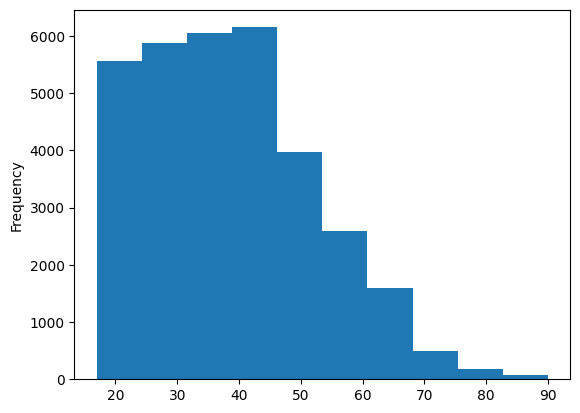

In [203]:
df_final['age'].plot(kind = 'hist')

In [204]:
skewness = df_final['age'].skew()
skewness

np.float64(0.5576661050594346)

<Axes: xlabel='age', ylabel='Count'>

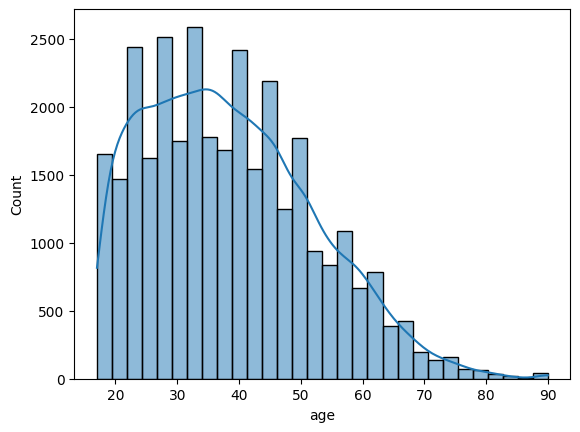

In [205]:
sns.histplot(df_final["age"], kde=True, bins=30)


In [206]:
df_final["age"] = np.log1p(df_final["age"])

<Axes: xlabel='age', ylabel='Count'>

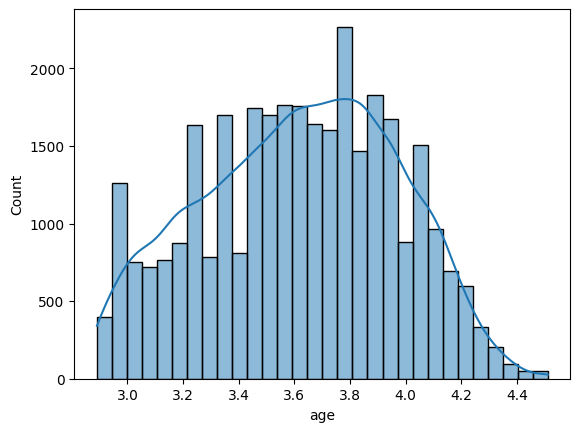

In [207]:
sns.histplot(df_final['age'],kde=True,bins=30)

# **Feature Selection**

**•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.**

In [208]:
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,income_ <=50K,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country,net_capital_gain,work_hours_category
0,3.688879,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,1.0,0.0,6,9,4,0,1,38,2174,Full-time
1,3.931826,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,1.0,0.0,5,9,2,3,0,38,0,Part-time
2,3.663562,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,1.0,0.0,3,11,0,5,1,38,0,Full-time
3,3.988984,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,1.0,0.0,3,1,2,5,0,38,0,Full-time
4,3.367296,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,1.0,0.0,3,9,2,9,5,4,0,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,3.555348,204461,16,0,0,60,0.0,0.0,0.0,0.0,...,1.0,0.0,3,10,2,9,0,38,0,Overtime
32533,4.007333,337992,13,0,0,50,0.0,0.0,0.0,0.0,...,0.0,1.0,3,9,2,3,0,23,0,Overtime
32534,3.637586,179137,10,0,0,39,0.0,0.0,0.0,0.0,...,1.0,0.0,3,15,0,0,4,38,0,Full-time
32535,3.135494,325033,8,0,0,35,0.0,0.0,0.0,0.0,...,1.0,0.0,3,2,4,10,3,38,0,Full-time


In [215]:
df_final = pd.get_dummies(df_final)

In [209]:
from sklearn.ensemble import IsolationForest

In [216]:
iso = IsolationForest(random_state=10,contamination=0.1)
iso.fit(df_final)
out=iso.predict(df_final)

In [218]:
df_final['Outlier']=out

In [219]:
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,education,marital_status,occupation,relationship,native_country,net_capital_gain,work_hours_category_Part-time,work_hours_category_Full-time,work_hours_category_Overtime,Outlier
0,3.688879,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,9,4,0,1,38,2174,False,True,False,1
1,3.931826,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,9,2,3,0,38,0,True,False,False,1
2,3.663562,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,11,0,5,1,38,0,False,True,False,1
3,3.988984,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,1,2,5,0,38,0,False,True,False,1
4,3.367296,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,9,2,9,5,4,0,False,True,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,3.555348,204461,16,0,0,60,0.0,0.0,0.0,0.0,...,10,2,9,0,38,0,False,False,True,1
32533,4.007333,337992,13,0,0,50,0.0,0.0,0.0,0.0,...,9,2,3,0,23,0,False,False,True,1
32534,3.637586,179137,10,0,0,39,0.0,0.0,0.0,0.0,...,15,0,0,4,38,0,False,True,False,1
32535,3.135494,325033,8,0,0,35,0.0,0.0,0.0,0.0,...,2,4,10,3,38,0,False,True,False,1


Outliers can negatively impact model performance by distorting statistical measures like the mean and standard deviation, leading to biased predictions. In linear models, they pull the regression line toward extreme values, reducing accuracy. In clustering, they shift cluster centers, leading to poor grouping. Decision trees are less sensitive but may create unnecessary splits, increasing complexity. Outliers can also cause models to overfit, reducing generalization to new data. To handle them, techniques like transformation (log, Box-Cox), capping, or using robust models (e.g., decision trees) can be applied.

**•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.**

In [224]:
import ppscore as pps


In [225]:
pps_matrix=pps.matrix(df_final)

In [226]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,fnlwgt,0.000000e+00,regression,True,mean absolute error,76989.887800,78397.418523,DecisionTreeRegressor()
2,age,education_num,0.000000e+00,regression,True,mean absolute error,1.878200,1.931043,DecisionTreeRegressor()
3,age,capital_gain,0.000000e+00,regression,True,mean absolute error,1186.448000,2137.704324,DecisionTreeRegressor()
4,age,capital_loss,0.000000e+00,regression,True,mean absolute error,82.282000,156.281986,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
671,Outlier,net_capital_gain,0.000000e+00,regression,True,mean absolute error,1268.730000,1993.303097,DecisionTreeRegressor()
672,Outlier,work_hours_category_Part-time,2.512196e-07,classification,True,weighted F1,0.862188,0.862188,DecisionTreeClassifier()
673,Outlier,work_hours_category_Full-time,1.362558e-01,classification,True,weighted F1,0.529200,0.593349,DecisionTreeClassifier()
674,Outlier,work_hours_category_Overtime,0.000000e+00,classification,True,weighted F1,0.586400,0.582758,DecisionTreeClassifier()


In [228]:
pps_matrix = pd.DataFrame(pps_matrix)

In [229]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,fnlwgt,0.000000e+00,regression,True,mean absolute error,76989.887800,78397.418523,DecisionTreeRegressor()
2,age,education_num,0.000000e+00,regression,True,mean absolute error,1.878200,1.931043,DecisionTreeRegressor()
3,age,capital_gain,0.000000e+00,regression,True,mean absolute error,1186.448000,2137.704324,DecisionTreeRegressor()
4,age,capital_loss,0.000000e+00,regression,True,mean absolute error,82.282000,156.281986,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
671,Outlier,net_capital_gain,0.000000e+00,regression,True,mean absolute error,1268.730000,1993.303097,DecisionTreeRegressor()
672,Outlier,work_hours_category_Part-time,2.512196e-07,classification,True,weighted F1,0.862188,0.862188,DecisionTreeClassifier()
673,Outlier,work_hours_category_Full-time,1.362558e-01,classification,True,weighted F1,0.529200,0.593349,DecisionTreeClassifier()
674,Outlier,work_hours_category_Overtime,0.000000e+00,classification,True,weighted F1,0.586400,0.582758,DecisionTreeClassifier()


In [231]:
pps_matrix[pps_matrix.case!='predict_itself'].iloc[:,[0,1,2,3,5,8]].sort_values('ppscore',ascending=False)

,x,y,ppscore,case,metric,model
418,education,education_num,1.0,regression,mean absolute error,DecisionTreeRegressor()
352,income_ <=50K,income_ >50K,1.0,regression,mean absolute error,DecisionTreeRegressor()
68,education_num,education,1.0,regression,mean absolute error,DecisionTreeRegressor()
377,income_ >50K,income_ <=50K,1.0,regression,mean absolute error,DecisionTreeRegressor()
323,sex_ Male,sex_ Female,1.0,regression,mean absolute error,DecisionTreeRegressor()
...,...,...,...,...,...,...
244,race_ Other,race_ White,0.0,regression,mean absolute error,DecisionTreeRegressor()
245,race_ Other,sex_ Female,0.0,regression,mean absolute error,DecisionTreeRegressor()
246,race_ Other,sex_ Male,0.0,regression,mean absolute error,DecisionTreeRegressor()
247,race_ Other,income_ <=50K,0.0,regression,mean absolute error,DecisionTreeRegressor()
